In [49]:
import pandas as pd
import numpy as np
import os

DATA_PATH = "data/main_dataset_2024.csv"
OUT_DIR = "analysis_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# 1. Load data
df = pd.read_csv(DATA_PATH)
df

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,cik,relate,spec,senti,commit,metrics,strategy,governance,risk,all_total_emissions
0,AAPL,Apple Inc,USD,NASDAQ NMS - GLOBAL MARKET,Technology,https://static.finnhub.io/logo/87cb30d8-80df-1...,https://www.apple.com/,BB,Medium,B,...,320193,0.956958,0.740072,0.25,0.83,0.275294,0.665882,0.014118,0.044706,1.560000e+07
1,AEP,American Electric Power Company Inc,USD,NASDAQ NMS - GLOBAL MARKET,Utilities,https://static.finnhub.io/logo/65ca8abe-80eb-1...,https://www.aep.com/,A,High,BB,...,4904,0.727440,0.263393,0.41,0.51,0.158491,0.705660,0.098113,0.037736,4.812405e+07
2,AMZN,Amazon.com Inc,USD,NASDAQ NMS - GLOBAL MARKET,Retail,https://static.finnhub.io/logo/967bf7b0-80df-1...,https://www.amazon.com/,AA,Excellent,BB,...,1018724,0.717949,0.771429,0.13,0.90,0.241509,0.724528,0.030189,0.003774,6.825000e+07
3,COST,Costco Wholesale Corp,USD,NASDAQ NMS - GLOBAL MARKET,Retail,https://static2.finnhub.io/file/publicdatany/f...,https://www.costco.com/,A,High,BB,...,909832,0.057495,0.052632,0.93,0.07,0.000000,0.960000,0.040000,0.000000,4.700000e+06
4,CSCO,Cisco Systems Inc,USD,NASDAQ NMS - GLOBAL MARKET,Communications,https://static.finnhub.io/logo/ca223cac-80df-1...,https://www.cisco.com/,B,Medium,B,...,858877,0.402878,0.727273,0.21,0.82,0.341463,0.658537,0.000000,0.000000,1.709231e+07
5,LNT,Alliant Energy Corp,USD,NASDAQ NMS - GLOBAL MARKET,Utilities,https://static.finnhub.io/logo/1981fcae-80ec-1...,https://www.alliantenergy.com/,A,High,BB,...,352541,0.739003,0.606557,0.43,0.52,0.349398,0.614458,0.018072,0.018072,1.556385e+07
6,GOOGL,Alphabet Inc,USD,NASDAQ NMS - GLOBAL MARKET,Media,https://static2.finnhub.io/file/publicdatany/f...,https://abc.xyz/,B,Medium,BB,...,1652044,0.995683,0.670782,0.24,0.69,0.397408,0.550756,0.019438,0.032397,5.641804e+04
7,META,Meta Platforms Inc,USD,NASDAQ NMS - GLOBAL MARKET,Media,https://static2.finnhub.io/file/publicdatany/f...,https://www.facebook.com,B,Medium,B,...,1326801,0.893878,0.438095,0.36,0.68,0.362500,0.606250,0.012500,0.018750,7.500000e+06
8,MSFT,Microsoft Corp,USD,NASDAQ NMS - GLOBAL MARKET,Technology,https://static.finnhub.io/logo/25e313016e9fac0...,https://www.microsoft.com/en-us,AA,Excellent,BBB,...,789019,0.988235,0.504808,0.11,0.86,0.152174,0.801630,0.008152,0.038043,1.716200e+07
9,NVDA,NVIDIA Corp,USD,NASDAQ NMS - GLOBAL MARKET,Semiconductors,https://static2.finnhub.io/file/publicdatany/f...,https://www.nvidia.com/,BB,Medium,BB,...,1045810,0.571429,0.191489,0.36,0.50,0.245614,0.561404,0.122807,0.070175,3.692423e+06


## Feature Engineering

In [57]:
# Standardize ticker just in case
df["ticker"] = df["ticker"].str.upper()

# Rank emissions: high emissions → rank 1 (worst polluters)
df["rank_emissions"] = df["all_total_emissions"].rank(ascending=False, method="dense")
# Rank ESG score: high ESG → rank 1 (best performers)
df["rank_esg"] = df["total_score"].rank(ascending=False, method="dense")
# Rank vagueness: low specificity = more vague → rank 1 = most vague
df["rank_vagueness"] = df["spec"].rank(ascending=True, method="dense")
# Rank commitment: low commitment → rank 1
df["rank_commitment"] = df["commit"].rank(ascending=True, method="dense")

# Greenwash Score = High emissions + low ESG + vague language + low commitment
df["greenwash_score"] = (
    df["rank_emissions"] * 0.4 +
    df["rank_esg"] * 0.2 +
    df["rank_vagueness"] * 0.2 +
    df["rank_commitment"] * 0.2
)

# Log emissions
df["log_emissions"] = np.log1p(df["all_total_emissions"])


# Lower score = less suspicious; higher = more suspicious
df[[
    "name", "industry", "all_total_emissions", "log_emissions",
    "spec", "commit", "metrics", "strategy", "governance", "risk",
    "rank_emissions", "rank_vagueness", "rank_commitment", "rank_esg",
    "greenwash_score"
]].sort_values("greenwash_score", ascending=False)

,name,industry,all_total_emissions,log_emissions,spec,commit,metrics,strategy,governance,risk,rank_emissions,rank_vagueness,rank_commitment,rank_esg,greenwash_score
6,Alphabet Inc,Media,5.641804e+04,10.940562,0.670782,0.69,0.397408,0.550756,0.019438,0.032397,42.0,37.0,24.0,29.0,34.8
25,Visa Inc,Technology,4.870000e+05,13.096021,0.510638,0.65,0.341270,0.531746,0.071429,0.055556,40.0,28.0,21.0,15.0,28.8
0,Apple Inc,Technology,1.560000e+07,16.562782,0.740072,0.83,0.275294,0.665882,0.014118,0.044706,18.0,40.0,31.0,34.0,28.2
4,Cisco Systems Inc,Communications,1.709231e+07,16.654139,0.727273,0.82,0.341463,0.658537,0.000000,0.000000,16.0,39.0,30.0,37.0,27.6
21,Nucor Corp,Metals and Mining,5.386354e+06,15.499379,0.393443,0.67,0.138889,0.787037,0.064815,0.009259,34.0,14.0,22.0,31.0,27.0
7,Meta Platforms Inc,Media,7.500000e+06,15.830414,0.438095,0.68,0.362500,0.606250,0.012500,0.018750,27.0,18.0,23.0,39.0,26.8
29,Westrock Co,Packaging,5.779510e+06,15.569830,0.470588,0.89,0.100000,0.900000,0.000000,0.000000,32.0,22.0,34.0,14.0,26.8
20,NiSource Inc,Utilities,5.027591e+06,15.430452,0.418182,0.54,0.164894,0.691489,0.047872,0.095745,35.0,15.0,15.0,32.0,26.4
12,Bank of America Corp,Banking,6.882100e+04,11.139279,0.257403,0.45,0.309623,0.401674,0.158996,0.129707,41.0,6.0,7.0,35.0,26.0
9,NVIDIA Corp,Semiconductors,3.692423e+06,15.121794,0.191489,0.50,0.245614,0.561404,0.122807,0.070175,37.0,4.0,12.0,33.0,24.6


## Talk vs Walk regression: emissions from language patterns Regression Predicting Emissions

In [64]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

lang_features = [
    "spec",                 # specificity fraction
    "commit",               # commitment fraction
    "metrics",
    "strategy",
    "governance",
    "risk",
    "relate",               # climate-relatedness
    "senti",                # sentiment (risk/opportunity)
]

# Data
X = df[lang_features].copy()
y = df["log_emissions"].values

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit random forest
reg = RandomForestRegressor(
    n_estimators=500,
    random_state=0,
    min_samples_leaf=2
)
reg.fit(X_scaled, y)

# Predictions + residuals
y_pred = reg.predict(X_scaled)
residuals = y - y_pred  # positive => actual > predicted

df.loc[X.index, "emissions_predicted_log"] = y_pred
df.loc[X.index, "emissions_residual_log"] = residuals

# z-score residuals
resid_mean = residuals.mean()
resid_std = residuals.std()
df.loc[X.index, "emissions_residual_z"] = (residuals - resid_mean) / resid_std

# Inspect top offenders
df.sort_values("emissions_residual_z", ascending=False)[
    ["name", "industry", "all_total_emissions", "emissions_residual_z"]
].head(10)

,name,industry,all_total_emissions,emissions_residual_z
8,Microsoft Corp,Technology,17162000.00,1.516744
30,Exxon Mobil Corp,Energy,36792767.30,1.256501
13,Duke Energy Corp,Utilities,65077745.60,1.255040
2,Amazon.com Inc,Retail,68250000.00,1.189994
24,Valero Energy Corp,Energy,23535216.60,1.106138
0,Apple Inc,Technology,15600000.00,1.068410
15,DTE Energy Co,Utilities,23317452.07,1.008618
1,American Electric Power Company Inc,Utilities,48124049.10,0.732557
31,Chevron Corp,Energy,19859598.27,0.715167
32,Conocophillips,Energy,7979116.61,0.708047


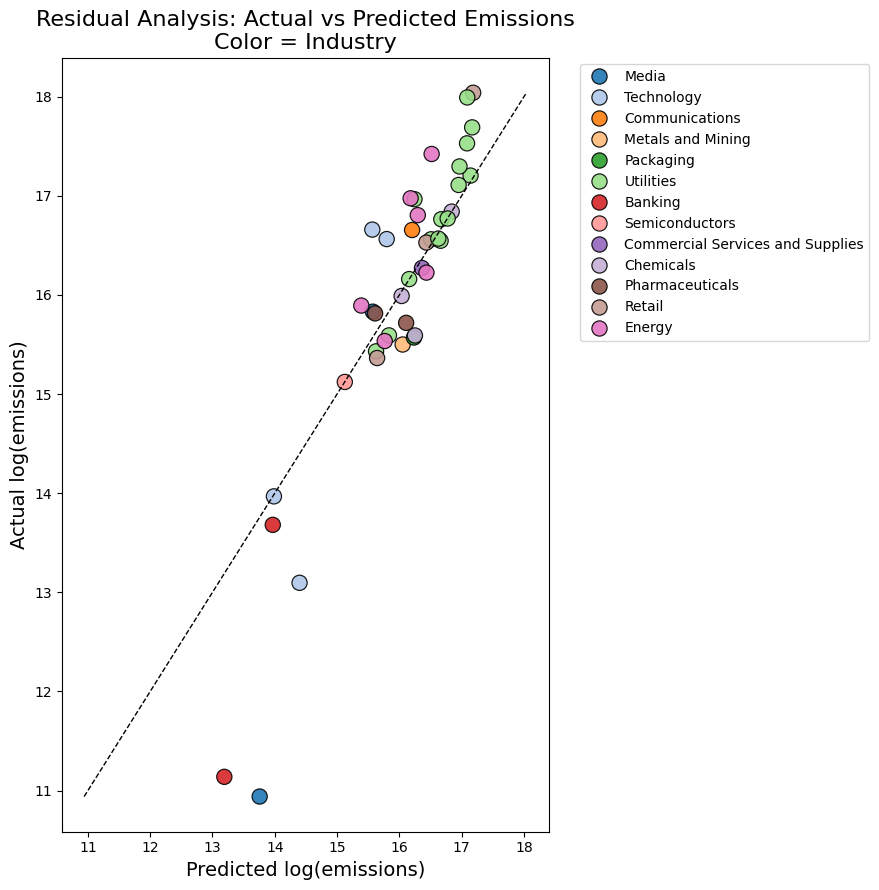

In [65]:
# %%
plt.figure(figsize=(9, 9))

industries = df["industry"].unique()
palette = sns.color_palette("tab20", len(industries))

sns.scatterplot(
    data=df,
    x="emissions_predicted_log",
    y="log_emissions",
    hue="industry",
    palette=palette,
    s=120,
    alpha=0.9,
    edgecolor="black"
)

# 45-degree perfect prediction line
lims = [
    min(df["log_emissions"].min(), df["emissions_predicted_log"].min()),
    max(df["log_emissions"].max(), df["emissions_predicted_log"].max())
]
plt.plot(lims, lims, 'k--', linewidth=1)

plt.xlabel("Predicted log(emissions)", fontsize=14)
plt.ylabel("Actual log(emissions)", fontsize=14)
plt.title("Residual Analysis: Actual vs Predicted Emissions\nColor = Industry", fontsize=16)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Residual Analysis Visualization

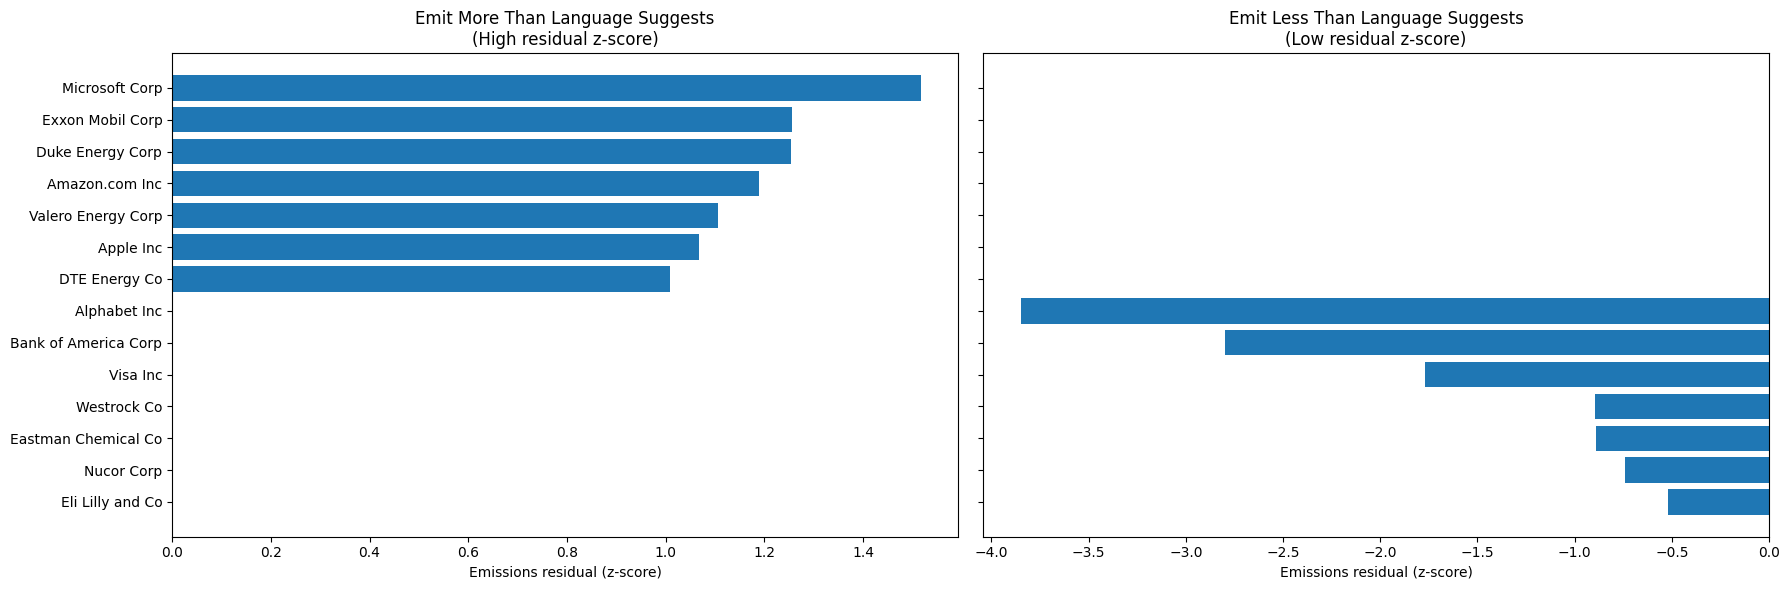

In [66]:
top_n = 7

suspects = df.sort_values("emissions_residual_z", ascending=False).head(top_n)
quiet_winners = df.sort_values("emissions_residual_z", ascending=True).head(top_n)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Suspected greenwashers (emit more than language implies)
axes[0].barh(suspects["name"], suspects["emissions_residual_z"])
axes[0].set_title("Emit More Than Language Suggests\n(High residual z-score)")
axes[0].invert_yaxis()
axes[0].set_xlabel("Emissions residual (z-score)")

# Overperformers (emit less than language implies)
axes[1].barh(quiet_winners["name"], quiet_winners["emissions_residual_z"])
axes[1].set_title("Emit Less Than Language Suggests\n(Low residual z-score)")
axes[1].set_xlabel("Emissions residual (z-score)")

plt.tight_layout()
plt.show()

## ESG vs. Language Tension

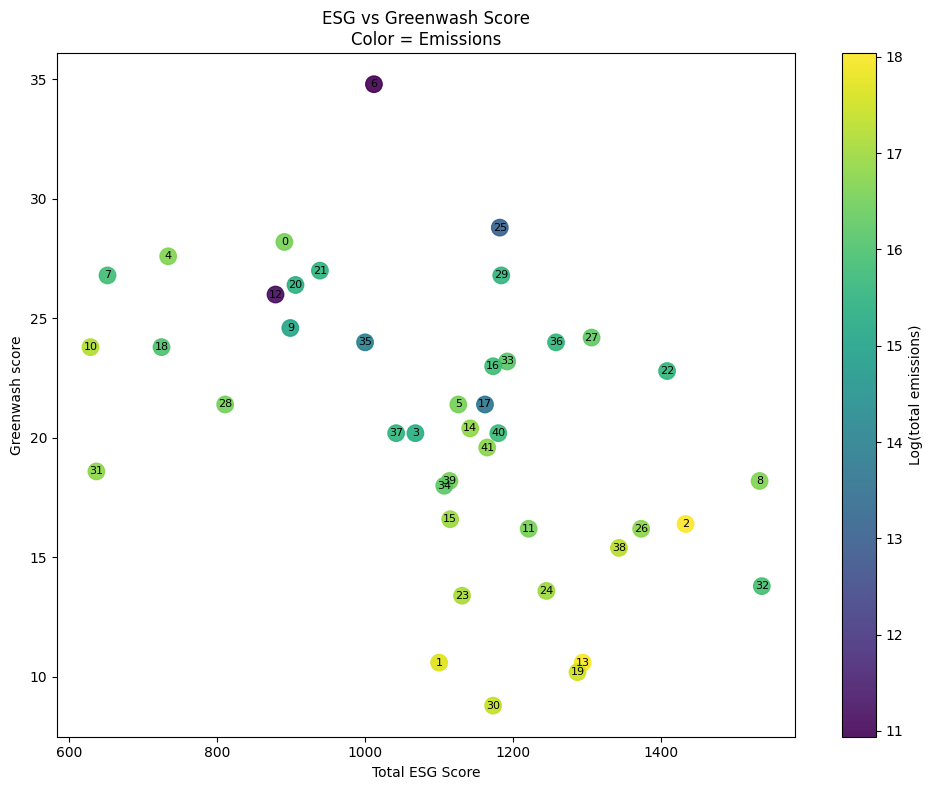

In [67]:
# ESG vs greenwash_score (color by emissions)

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(
    df["total_score"],
    df["greenwash_score"],
    c=df["log_emissions"],
    cmap="viridis",
    s=140,
    alpha=0.9,
)

for ticker, row in df.iterrows():
    ax.text(row["total_score"], row["greenwash_score"], ticker,
            fontsize=8, ha="center", va="center")

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Log(total emissions)")

ax.set_xlabel("Total ESG Score")
ax.set_ylabel("Greenwash score")
ax.set_title("ESG vs Greenwash Score\nColor = Emissions")

plt.tight_layout()
plt.show()

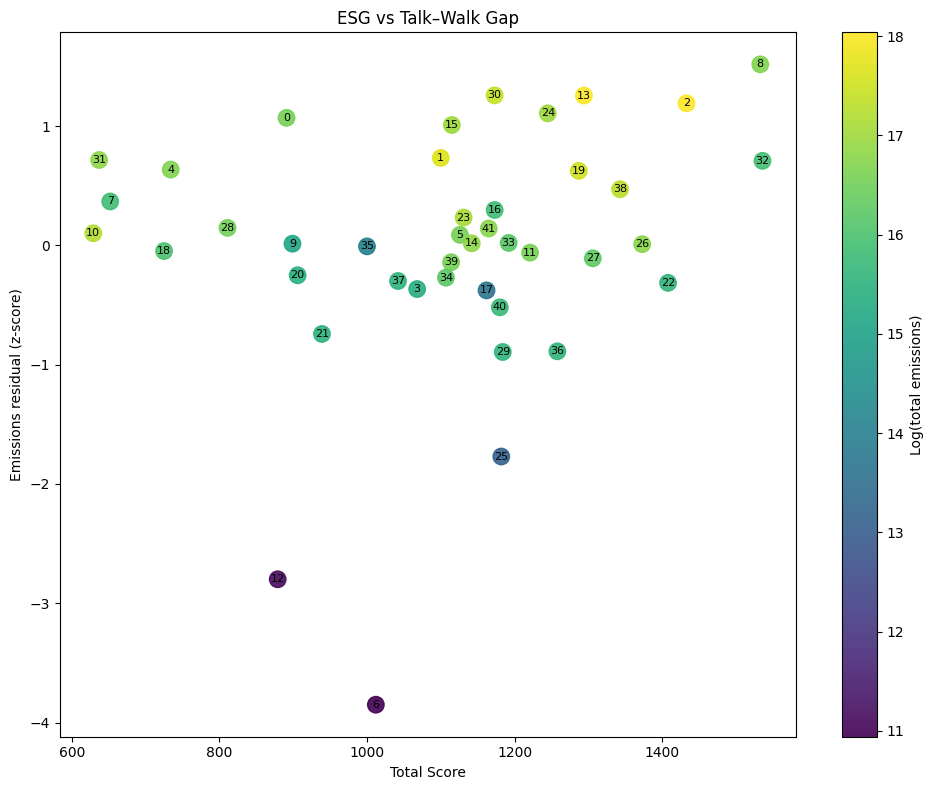

In [71]:
# ESG vs talk–walk residual (color by emissions)

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(
    df["total_score"],
    df["emissions_residual_z"],
    c=df["log_emissions"],
    cmap="viridis",
    s=140,
    alpha=0.9,
)

for ticker, row in df.iterrows():
    ax.text(row["total_score"], row["emissions_residual_z"], ticker,
            fontsize=8, ha="center", va="center")

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Log(total emissions)")

ax.set_xlabel("Total Score")
ax.set_ylabel("Emissions residual (z-score)")
ax.set_title("ESG vs Talk–Walk Gap")

plt.tight_layout()
plt.show()


## Industry Adjusted z-scores

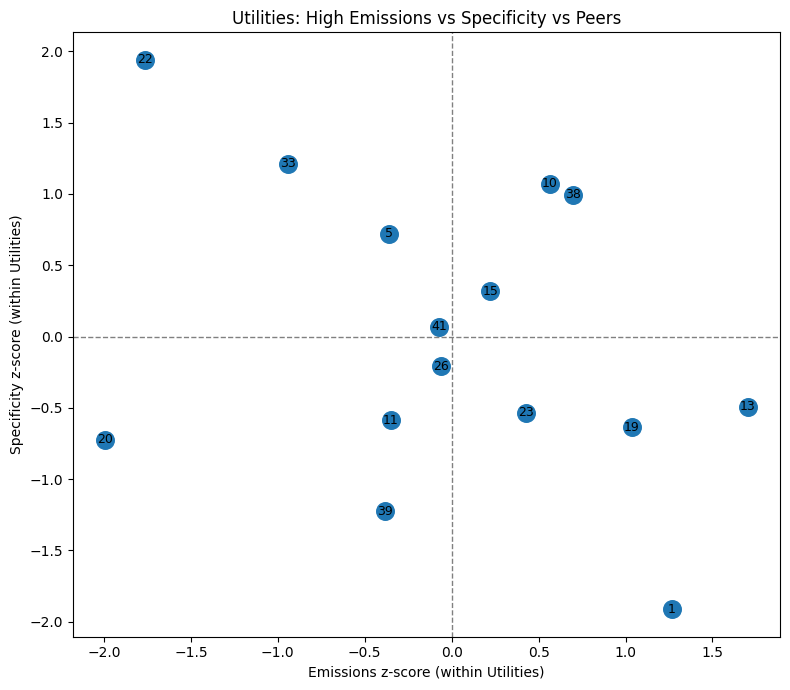

In [78]:
# Industry-adjusted z-scores for emissions, specificity, commitment
def add_group_zscores(df, group_col, value_cols, suffix="_z_industry"):
    df = df.copy()
    for col in value_cols:
        z_col = f"{col}{suffix}"
        df[z_col] = (
            df.groupby(group_col)[col]
              .transform(lambda x: (x - x.mean()) / (x.std(ddof=0) + 1e-9))
        )
    return df

value_cols = ["log_emissions", "spec", "commit"]
df = add_group_zscores(df, "industry", value_cols)

sector = "Utilities" # test others
df_sector = df[df["industry"] == sector].copy()

fig, ax = plt.subplots(figsize=(8, 7))

scatter = ax.scatter(
    df_sector["log_emissions_z_industry"],
    df_sector["spec_z_industry"],
    s=160
)

for ticker, row in df_sector.iterrows():
    ax.text(row["log_emissions_z_industry"],
            row["spec_z_industry"],
            ticker,
            fontsize=9,
            ha="center", va="center")

ax.axvline(0, color="grey", linestyle="--", linewidth=1)
ax.axhline(0, color="grey", linestyle="--", linewidth=1)
ax.set_xlabel("Emissions z-score (within Utilities)")
ax.set_ylabel("Specificity z-score (within Utilities)")
ax.set_title(f"{sector}: High Emissions vs Specificity vs Peers")

plt.tight_layout()
plt.show()

# Greenwashing Frontier

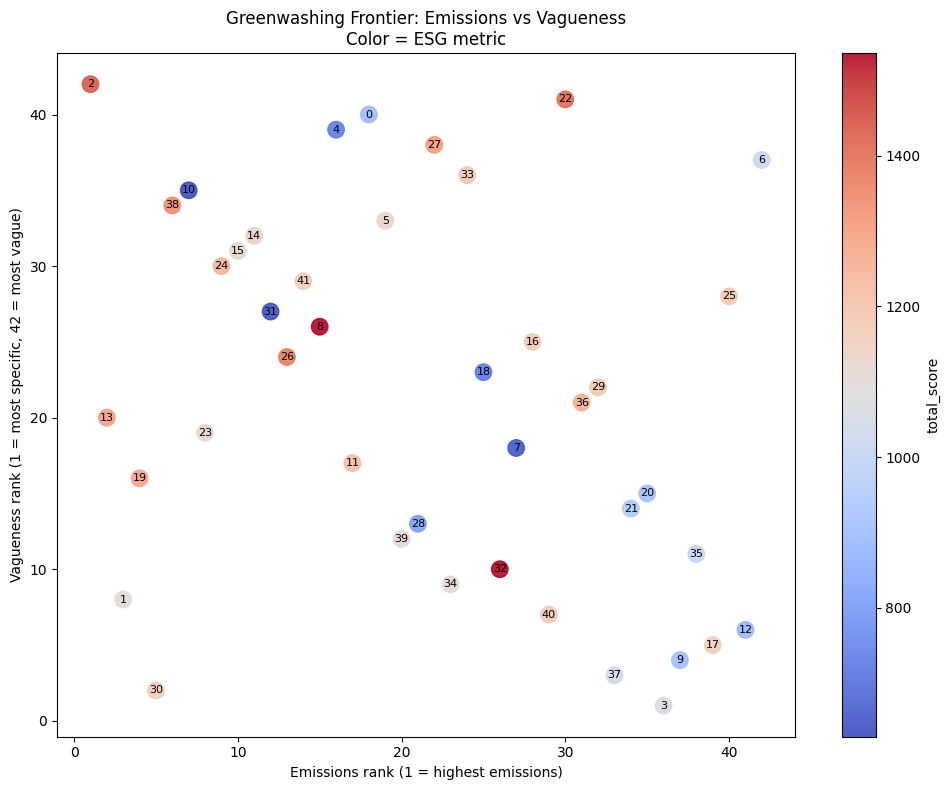

,name,industry,rank_emissions,rank_vagueness,total_score,greenwash_score
10,Xcel Energy Inc,Utilities,7.0,35.0,629,23.8
14,CF Industries Holdings Inc,Chemicals,11.0,32.0,1142,20.4
41,Evergy Inc,Utilities,14.0,29.0,1165,19.6
15,DTE Energy Co,Utilities,10.0,31.0,1115,16.6
2,Amazon.com Inc,Retail,1.0,42.0,1433,16.4
38,Entergy Corp,Utilities,6.0,34.0,1343,15.4
24,Valero Energy Corp,Energy,9.0,30.0,1245,13.6


In [79]:
# Greenwashing frontier: rank_emissions vs rank_vagueness, color = ESG
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(
    df["rank_emissions"],   # 1 = most emitting
    df["rank_vagueness"],   # 42 = most vague
    c=df["total_score"],
    cmap="coolwarm",
    s=140,
    alpha=0.9
)

for ticker, row in df.iterrows():
    ax.text(row["rank_emissions"], row["rank_vagueness"], ticker,
            fontsize=8, ha="center", va="center")

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("total_score")

ax.set_xlabel("Emissions rank (1 = highest emissions)")
ax.set_ylabel("Vagueness rank (1 = most specific, 42 = most vague)")
ax.set_title("Greenwashing Frontier: Emissions vs Vagueness\nColor = ESG metric")

plt.tight_layout()
plt.show()

# Frontier table: high emissions, high vagueness, high ESG / greenwash_score
N = len(df)

high_emissions = df["rank_emissions"] <= (N / 3)      # top third emitters
high_vagueness = df["rank_vagueness"] >= (2 * N / 3)  # most vague third

frontier = df[high_emissions & high_vagueness].copy()

frontier = frontier.sort_values("greenwash_score", ascending=False)

frontier[[
    "name", "industry",
    "rank_emissions", "rank_vagueness",
    "total_score", "greenwash_score"
]]

In [35]:
import os

for file in os.listdir("data/processed_txt_2024"):
    file_path = os.path.join("data/processed_txt_2024", file)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as f:
            content = f.read()
            print(f"{file}: {len(content)} characters")

evrg_2024_chunks.txt: 212479 characters
WMT_2025_chunks.txt: 446183 characters
cms_2024_chunks.txt: 121140 characters
V_2024_chunks.txt: 250554 characters
XOM_2024_chunks.txt: 226671 characters
MSFT_2024_chunks.txt: 256917 characters
fe_2024_chunks.txt: 151857 characters
aep_2024_chunks.txt: 287333 characters
LLY_2024_chunks.txt: 287544 characters
BAC_2024_chunks.txt: 403086 characters
COST_2024_chunks.txt: 247376 characters
xel_2024_chunks.txt: 244540 characters
CSCO_2024_chunks.txt: 146673 characters
cop_2024_chunks.txt: 248098 characters
AMZN_2024_chunks.txt: 304538 characters
wm_2024_chunks.txt: 78697 characters
AAPL_2024_chunks.txt: 357221 characters
oxy_2024_chunks.txt: 421492 characters
dte_2024_chunks.txt: 229865 characters
emn_2024_chunks.txt: 264123 characters
ORCL_2024_chunks.txt: 71385 characters
wrk_2024_chunks.txt: 34998 characters
lnt_2024_chunks.txt: 170828 characters
ni_2024_chunks.txt: 190044 characters
META_2024_chunks.txt: 124963 characters
duk_2024_chunks.txt: 1715

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

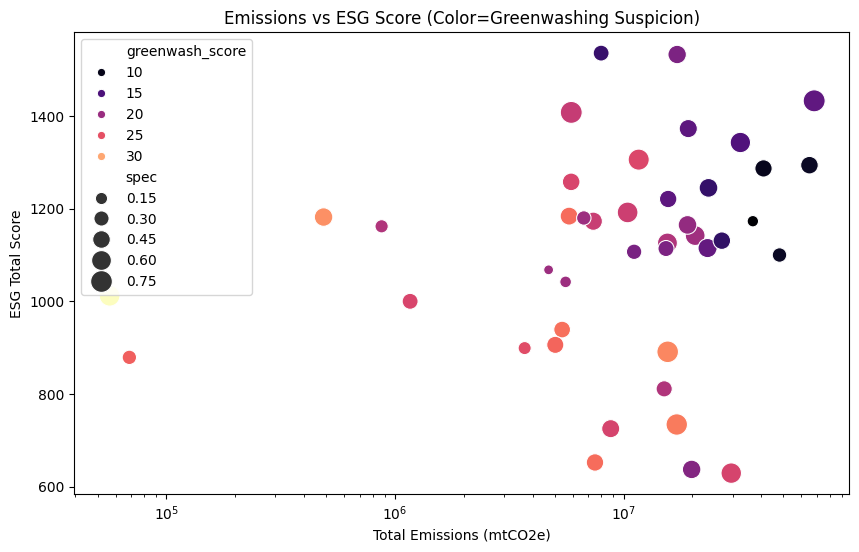

In [29]:
# 4. Visualization Section
# === Scatter: Emissions vs ESG Score ===
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="all_total_emissions",
    y="total_score",
    hue="greenwash_score",
    palette="magma",
    size="spec",
    sizes=(50,250),
)
plt.title("Emissions vs ESG Score (Color=Greenwashing Suspicion)")
plt.xlabel("Total Emissions (mtCO2e)")
plt.ylabel("ESG Total Score")
plt.xscale("log")
plt.colorbar(plt.cm.ScalarMappable(cmap="magma"))
plt.close()

Text(0, 0.5, 'ESG Rank (1=best ESG)')

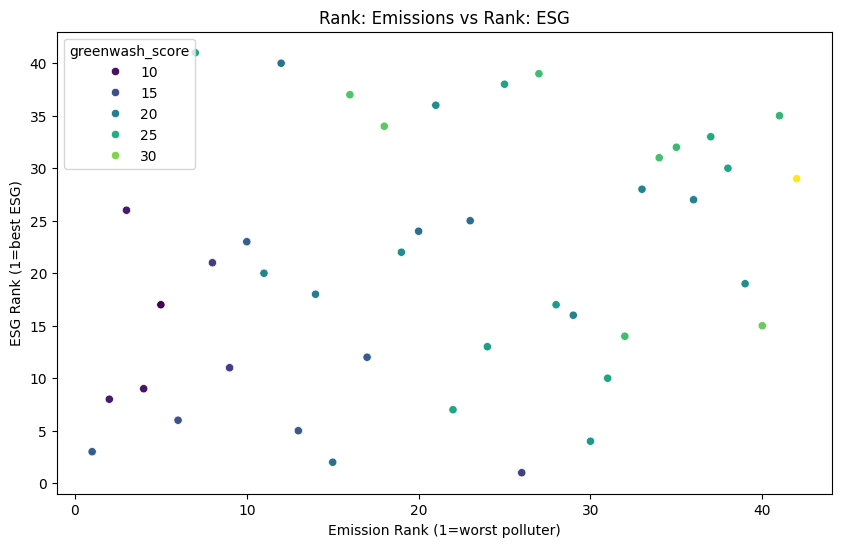

In [31]:
# === Scatter: Emissions Rank vs ESG Rank ===
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="rank_emissions",
    y="rank_esg",
    hue="greenwash_score",
    palette="viridis",
)
plt.title("Rank: Emissions vs Rank: ESG")
plt.xlabel("Emission Rank (1=worst polluter)")
plt.ylabel("ESG Rank (1=best ESG)")

Text(0, 0.5, 'Total ESG Score')

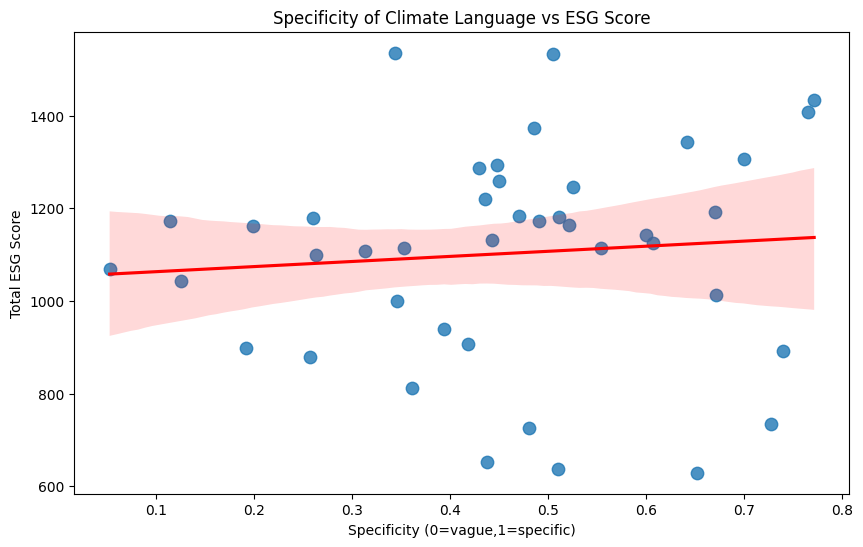

In [32]:
# === Specificity vs ESG ===
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x="spec",
    y="total_score",
    scatter_kws={"s":80},
    line_kws={"color":"red"}
)
plt.title("Specificity of Climate Language vs ESG Score")
plt.xlabel("Specificity (0=vague,1=specific)")
plt.ylabel("Total ESG Score")

In [33]:
# === Optional: save ranked tables ===
top_greenwash = df.nlargest(20, "greenwash_score")
least_greenwash = df.nsmallest(20, "greenwash_score")

In [34]:
top_greenwash

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,metrics,strategy,governance,risk,all_total_emissions,rank_emissions,rank_esg,rank_vagueness,rank_commitment,greenwash_score
6,GOOGL,Alphabet Inc,USD,NASDAQ NMS - GLOBAL MARKET,Media,https://static2.finnhub.io/file/publicdatany/f...,https://abc.xyz/,B,Medium,BB,...,0.397408,0.550756,0.019438,0.032397,5.641804e+04,42.0,29.0,37.0,24.0,34.8
25,V,Visa Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Technology,https://static.finnhub.io/logo/96a1dba6-80ec-1...,https://usa.visa.com/,A,High,BB,...,0.341270,0.531746,0.071429,0.055556,4.870000e+05,40.0,15.0,28.0,21.0,28.8
0,AAPL,Apple Inc,USD,NASDAQ NMS - GLOBAL MARKET,Technology,https://static.finnhub.io/logo/87cb30d8-80df-1...,https://www.apple.com/,BB,Medium,B,...,0.275294,0.665882,0.014118,0.044706,1.560000e+07,18.0,34.0,40.0,31.0,28.2
4,CSCO,Cisco Systems Inc,USD,NASDAQ NMS - GLOBAL MARKET,Communications,https://static.finnhub.io/logo/ca223cac-80df-1...,https://www.cisco.com/,B,Medium,B,...,0.341463,0.658537,0.000000,0.000000,1.709231e+07,16.0,37.0,39.0,30.0,27.6
21,NUE,Nucor Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Metals and Mining,https://static.finnhub.io/logo/61f6fa71dcc0648...,https://nucor.com/,BB,Medium,BB,...,0.138889,0.787037,0.064815,0.009259,5.386354e+06,34.0,31.0,14.0,22.0,27.0
7,META,Meta Platforms Inc,USD,NASDAQ NMS - GLOBAL MARKET,Media,https://static2.finnhub.io/file/publicdatany/f...,https://www.facebook.com,B,Medium,B,...,0.362500,0.606250,0.012500,0.018750,7.500000e+06,27.0,39.0,18.0,23.0,26.8
29,WRK,Westrock Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Packaging,https://static.finnhub.io/logo/3f3f2482-80d2-1...,https://www.westrock.com/,A,High,BB,...,0.100000,0.900000,0.000000,0.000000,5.779510e+06,32.0,14.0,22.0,34.0,26.8
20,NI,NiSource Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/3b042364-80ec-1...,https://www.nisource.com/,BB,Medium,BB,...,0.164894,0.691489,0.047872,0.095745,5.027591e+06,35.0,32.0,15.0,15.0,26.4
12,BAC,Bank of America Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Banking,https://static2.finnhub.io/file/publicdatany/f...,https://www.bankofamerica.com,B,Medium,BB,...,0.309623,0.401674,0.158996,0.129707,6.882100e+04,41.0,35.0,6.0,7.0,26.0
9,NVDA,NVIDIA Corp,USD,NASDAQ NMS - GLOBAL MARKET,Semiconductors,https://static2.finnhub.io/file/publicdatany/f...,https://www.nvidia.com/,BB,Medium,BB,...,0.245614,0.561404,0.122807,0.070175,3.692423e+06,37.0,33.0,4.0,12.0,24.6
